# Лабораторна робота 9 (1 частина)

Романенко Ілля ФІТ 4-7

## Крок 1

завантажимо датасет

In [1]:
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

2024-10-14 17:33:38.864468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 17:33:38.881063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 17:33:38.885620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 17:33:38.897707: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-14 17:33:39.747205: W tensorflow/compiler/tf2

перевіримо розрядність данних

In [2]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


виведемо перші 10 зображень

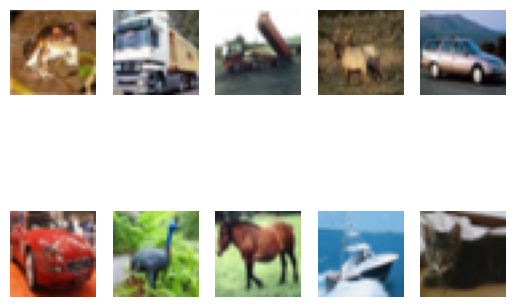

In [3]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

## Крок 2

підготуємо дані

In [4]:
import numpy as np

print("Кількість унікальних категорій:", len(np.unique(y_train)))

Кількість унікальних категорій: 10


In [5]:
from keras.utils import to_categorical

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Крок 3

підбір моделі

In [6]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/home/user/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,426 (1.39 MB)

 Trainable params: 364,426 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

## Крок 4

натренуємо модель

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=16, 
    validation_data=(x_test, y_test), 
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


2024-10-14 17:33:45.404630: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


3122/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2682 - loss: 2.0313

2024-10-14 17:34:21.949255: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.2683 - loss: 2.0311 - val_accuracy: 0.4812 - val_loss: 1.5398 - learning_rate: 0.0010
Epoch 2/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.4734 - loss: 1.5659 - val_accuracy: 0.5244 - val_loss: 1.4631 - learning_rate: 0.0010
Epoch 3/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.5402 - loss: 1.4354 - val_accuracy: 0.6109 - val_loss: 1.2715 - learning_rate: 0.0010
Epoch 4/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.5775 - loss: 1.3733 - val_accuracy: 0.6155 - val_loss: 1.2608 - learning_rate: 0.0010
Epoch 5/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.6070 - loss: 1.3122 - val_accuracy: 0.6325 - val_loss: 1.2294 - learning_rate: 0.0010
Epoch 6/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - accuracy: 0.6277 - loss: 1.2792 - val_accuracy: 0.6397 - val_loss: 1.2456 - learning_rate: 0.0010
Epoch 7/50
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6375 

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Тестова точність: {test_acc}")

2024-10-14 18:07:48.020497: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7665 - loss: 0.9243
Тестова точність: 0.7594000101089478


## Крок 5

побудуємо графіки втрат і точності

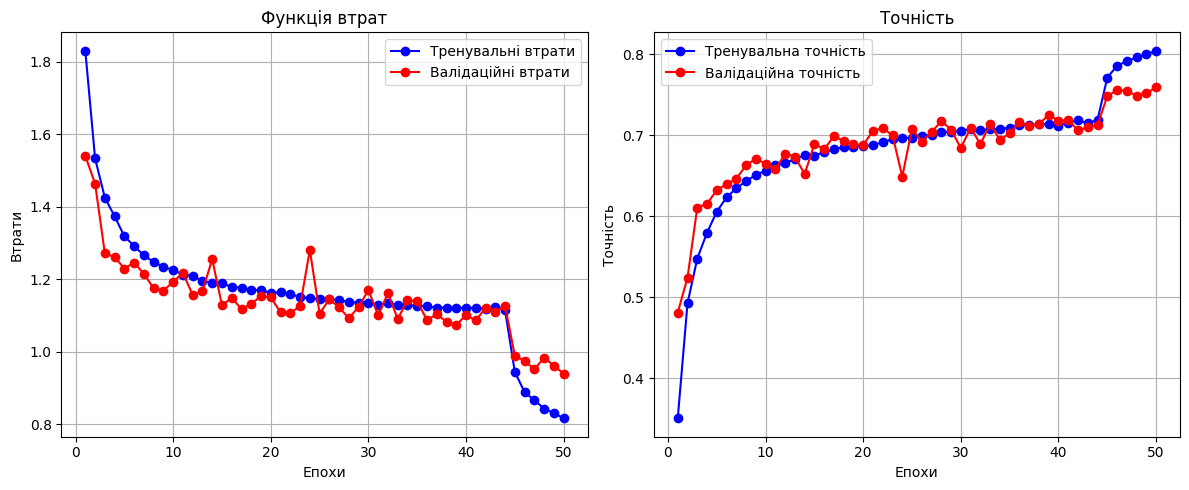

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Тренувальні втрати')
plt.plot(epochs, val_loss, 'ro-', label='Валідаційні втрати')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Тренувальна точність')
plt.plot(epochs, val_accuracy, 'ro-', label='Валідаційна точність')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Крок 6

виведемо класифікаційний звіт

In [11]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.argmax(axis=1)

print(classification_report(y_true, y_pred_classes))

 24/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

2024-10-14 18:07:51.504761: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1000
           1       0.89      0.88      0.89      1000
           2       0.72      0.60      0.65      1000
           3       0.53      0.66      0.59      1000
           4       0.68      0.79      0.73      1000
           5       0.73      0.59      0.65      1000
           6       0.83      0.81      0.82      1000
           7       0.79      0.78      0.79      1000
           8       0.85      0.86      0.86      1000
           9       0.82      0.86      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



збережемо модель локально

In [12]:
from datetime import datetime


save_date = datetime.now().strftime("%S_%M_%H_%d_%m_%Y")
model_name_path = f'models/cifar10_model_{save_date}.keras'
model.save(model_name_path) 

## Крок 7

виведемо візуалізацію розпізнавання

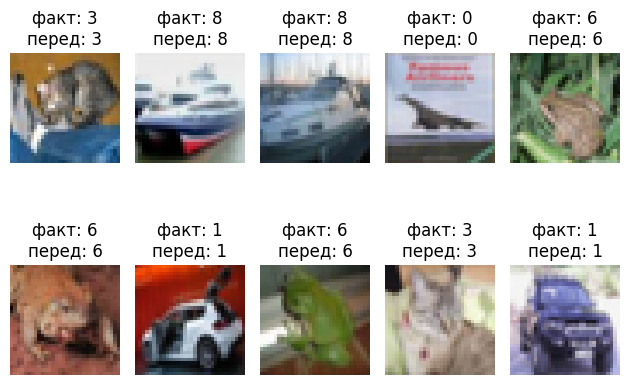

In [15]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f'факт: {np.argmax(y_test[i])}\nперед: {y_pred_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Висновки

Побудована згорткова НМ показала себе достатньо добре. Кінцевий результат в 0.75 точності розпізнавання зображень на тестовій вибірці загалом можна вважати задовільним результатом.

Додавання l2 регуляризації та шарів Dropout на рівні dence дозволило підвищити тестувальну точність на 0.05 (з ~0.70 до ~0.75). За даних параметрів навчання мережі досягло потолка в 50 епох, без повного зменшення learning rate до його мінімуму, що може означати, що можливо є сенс продовжити навчання, для отримання кращих результатів. В рамках лабораторної роботи цього не було зроблено, адже це потребувало ще чималих затрат по часу.